# Project description

You work for the OilyGiant mining company. Your task is to find the best place for a new well.

Steps to choose the location:

- Collect the oil well parameters in the selected region: oil quality and volume of reserves;
- Build a model for predicting the volume of reserves in the new wells;
- Pick the oil wells with the highest estimated values;
- Pick the region with the highest total profit for the selected oil wells.

You have data on oil samples from three regions. Parameters of each oil well in the region are already known. Build a model that will help to pick the region with the highest profit margin. Analyze potential profit and risks using the _Bootstrapping_ technique.

In [1]:
# Import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

### Reading in the dataset:

In [4]:
data_0 = pd.read_csv('geo_data_0.csv')
data_1 = pd.read_csv('geo_data_1.csv')
data_2 = pd.read_csv('geo_data_2.csv')

data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [6]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [8]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


**Removing Unnecessary Columns:**

In [11]:
data_0.drop("id", axis=1, inplace = True)
data_1.drop("id", axis=1, inplace = True)
data_2.drop("id", axis=1, inplace = True)

In [13]:
print('Region 0:')
display(data_0.head())
print('Region 1:')
display(data_1.head())
print('Region 2:')
display(data_2.head())

Region 0:


,f0,f1,f2,product
0,0.705745,-0.497823,1.221170,105.280062
1,1.334711,-0.340164,4.365080,73.037750
2,1.022732,0.151990,1.419926,85.265647
3,-0.032172,0.139033,2.978566,168.620776
4,1.988431,0.155413,4.751769,154.036647


Region 1:


,f0,f1,f2,product
0,-15.001348,-8.276000,-0.005876,3.179103
1,14.272088,-3.475083,0.999183,26.953261
2,6.263187,-5.948386,5.001160,134.766305
3,-13.081196,-11.506057,4.999415,137.945408
4,12.702195,-8.147433,5.004363,134.766305


Region 2:


,f0,f1,f2,product
0,-1.146987,0.963328,-0.828965,27.758673
1,0.262778,0.269839,-2.530187,56.069697
2,0.194587,0.289035,-5.586433,62.871910
3,2.236060,-0.553760,0.930038,114.572842
4,-0.515993,1.716266,5.899011,149.600746


**Data description**

Geological exploration data for the three regions are stored in files:
- _id_ — unique oil well identifier
- _f0, f1, f2_ — three features of points (their specific meaning is unimportant, but the features themselves are significant)
- _product_ — volume of reserves in the oil well (thousand barrels).

In [16]:
# Checking for duplicates
display(data_0.duplicated().sum())
display(data_1.duplicated().sum())
display(data_2.duplicated().sum())

0

0

0

There are no duplicate or missing rows in either of the three datasets.

### Exploratory Data Analysis:

**Univeriate EDA:**

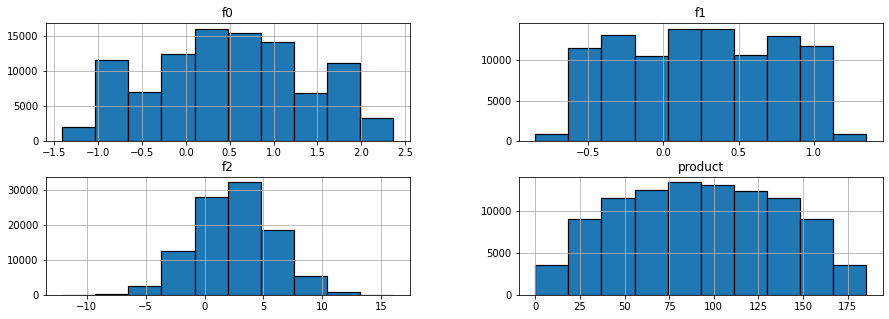

In [8]:
data_0.hist(edgecolor='black', linewidth=1.2, figsize=(15,5));

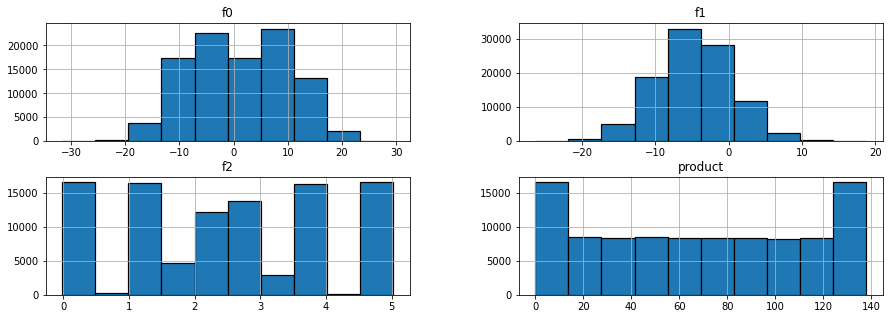

In [9]:
data_1.hist(edgecolor='black', linewidth=1.2, figsize=(15,5));

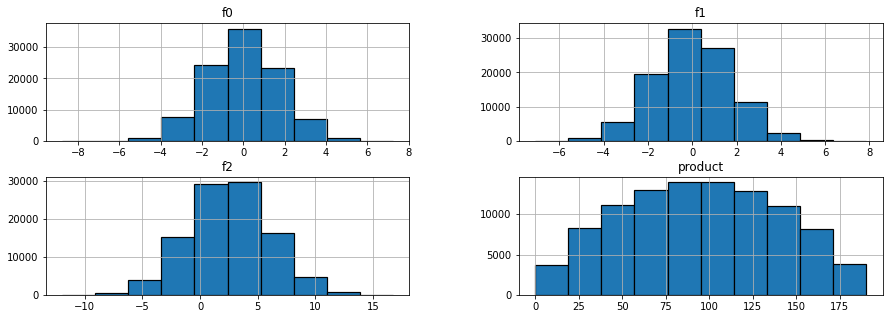

In [10]:
data_2.hist(edgecolor='black', linewidth=1.2, figsize=(15,5));

### Building a Linear Regression Model:

**Splitting and Standardizing the Data:**

In [18]:
# import
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Region 0

train_0, valid_0 = train_test_split(data_0, test_size=0.25, random_state=12345, shuffle=True)

# Training Data Split
features_train_0 = train_0.drop(['product'], axis=1)
target_train_0 = train_0['product']

# Validation Data Split
features_valid_0 = valid_0.drop(['product'], axis=1)
target_valid_0 = valid_0['product']

# Standardizing the Features
numeric = ['f0', 'f1', 'f2']
scaler = StandardScaler()
scaler.fit(features_train_0[numeric])
features_train_0[numeric] = scaler.transform(features_train_0[numeric])
features_valid_0[numeric] = scaler.transform(features_valid_0[numeric])

print(features_train_0.shape)

print(features_valid_0.shape)

print(features_train_0.head())

(75000, 3)
(25000, 3)
             f0        f1        f2
27212 -0.544828  1.390264 -0.094959
7866   1.455912 -0.480422  1.209567
62041  0.260460  0.825069 -0.204865
70185 -1.837105  0.010321 -0.147634
82230 -1.299243  0.987558  1.273181


In [20]:
# Region 1

train_1, valid_1 = train_test_split(data_1, test_size=0.25, random_state=12345, shuffle=True)

# Training Data Split
features_train_1 = train_1.drop(['product'], axis=1)
target_train_1 = train_1['product']

# Validation Data Split
features_valid_1 = valid_1.drop(['product'], axis=1)
target_valid_1 = valid_1['product']

# Standardizing the Features
numeric = ['f0', 'f1', 'f2']
scaler = StandardScaler()
scaler.fit(features_train_1[numeric])
features_train_1[numeric] = scaler.transform(features_train_1[numeric])
features_valid_1[numeric] = scaler.transform(features_valid_1[numeric])

print(features_train_1.shape)

print(features_valid_1.shape)

print(features_train_1.head())

(75000, 3)
(25000, 3)
             f0        f1        f2
27212 -0.850855  0.624428  0.296943
7866   1.971935  1.832275  0.294333
62041  1.079305  0.170127 -0.296418
70185 -1.512028 -0.887837 -0.880471
82230 -1.804775 -0.718311 -0.293255


In [22]:
# Region 2

train_2, valid_2 = train_test_split(data_2, test_size=0.25, random_state=12345, shuffle=True)

# Training Data Split
features_train_2 = train_2.drop(['product'], axis=1)
target_train_2 = train_2['product']

# Validation Data Split
features_valid_2 = valid_2.drop(['product'], axis=1)
target_valid_2 = valid_2['product']

# Standardizing the Features
numeric = ['f0', 'f1', 'f2']
scaler = StandardScaler()
scaler.fit(features_train_2[numeric])
features_train_2[numeric] = scaler.transform(features_train_2[numeric])
features_valid_2[numeric] = scaler.transform(features_valid_2[numeric])

print(features_train_2.shape)

print(features_valid_2.shape)

print(features_train_2.head())

(75000, 3)
(25000, 3)
             f0        f1        f2
27212 -0.526160  0.776329 -0.400793
7866  -0.889625 -0.404070 -1.222936
62041 -1.133984  0.208576  0.296765
70185  1.227045  1.570166 -0.764556
82230 -0.194289  0.878312  0.840821


**Training and Evaluating the Models:**        

In [24]:
# Import
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Region 0

lr_0 = LinearRegression() #Initializing the model
lr_0.fit(features_train_0, target_train_0) #Fitting the model to the training data
lr_0_predicted = lr_0.predict(features_valid_0) #Making predictions on the validation data

mse_0 = mean_squared_error(target_valid_0, lr_0_predicted) #Calculating MSE of the Model
pred_target_df_0 = pd.DataFrame({'y_pred': lr_0_predicted, 'target': target_valid_0})

print('The Average Volume of Predicted Reserves in Region 0 is:', lr_0_predicted.mean())
print('The RMSE of the Model is:', mse_0 ** 0.5 )


The Average Volume of Predicted Reserves in Region 0 is: 92.59256778438035
The RMSE of the Model is: 37.5794217150813


In [26]:
# Region 1

lr_1 = LinearRegression() #Initializing the model
lr_1.fit(features_train_1, target_train_1) #Fitting the model to the training data
lr_1_predicted = lr_1.predict(features_valid_1) #Making predictions on the validation data

mse_1 = mean_squared_error(target_valid_1, lr_1_predicted) #Calculating MSE of the Model
pred_target_df_1 = pd.DataFrame({'y_pred': lr_1_predicted, 'target': target_valid_1})

print('The Average Volume of Predicted Reserves in Region 1 is:', lr_1_predicted.mean())
print('The RMSE of the Model is:', mse_1 ** 0.5 )

The Average Volume of Predicted Reserves in Region 1 is: 68.728546895446
The RMSE of the Model is: 0.8930992867756167


In [28]:
# Region 2

lr_2 = LinearRegression() #Initializing the model
lr_2.fit(features_train_2, target_train_2) #Fitting the model to the training data
lr_2_predicted = lr_1.predict(features_valid_2) #Making predictions on the validation data

mse_2 = mean_squared_error(target_valid_2, lr_2_predicted) #Calculating MSE of the Model
pred_target_df_2 = pd.DataFrame({'y_pred': lr_2_predicted, 'target': target_valid_2})

print('The Average Volume of Predicted Reserves in Region 2 is:', lr_2_predicted.mean())
print('The RMSE of the Model is:', mse_2 ** 0.5 )

The Average Volume of Predicted Reserves in Region 2 is: 68.69716081021053
The RMSE of the Model is: 54.26459318751236


Region 0 is projected by the model to have the highest amount of reserves while also having the lowest RMSE.

### Profit Calculation

**Key Variables:**


In [30]:
budget = 100000000
unit_revenue = 4500
wells = 200


**Volume of reserves sufficient for developing a new well without losses:**

In [32]:
reserves = int((budget/wells) // unit_revenue)
print('Volume of reserves sufficient for developing a new well without losses:', reserves)

Volume of reserves sufficient for developing a new well without losses: 111


**Write a function to calculate profit:**

In [34]:
lr_0_predicted.shape, type(lr_0_predicted)

((25000,), numpy.ndarray)

In [36]:
pred_target_df_0.head()

,y_pred,target
71751,95.894952,10.038645
80493,77.572583,114.551489
2655,77.892640,132.603635
53233,90.175134,169.072125
91141,70.510088,122.325180


In [38]:
def profit(target, predicted):
    predicted_sorted = predicted.sort_values(ascending=False)
    selected_points = target[predicted_sorted.index][:200]
    product = selected_points.sum()
    revenue = product * unit_revenue
    return revenue - budget

profit_value_0 = profit(pred_target_df_0['target'],pred_target_df_0['y_pred'])
profit_value_1 = profit(pred_target_df_1['target'],pred_target_df_1['y_pred'])
profit_value_2 = profit(pred_target_df_2['target'],pred_target_df_2['y_pred'])

print(profit_value_0)
print(profit_value_1)
print(profit_value_2)

33208260.43139851
24150866.966815114
27372121.43286684


### Calculate the Risks and Profit for Each Region

In [40]:
state = np.random.RandomState(12345)


# Region 0
values = []
for i in range(1000):
    target_subsample = target_valid_0.sample(n=500, replace=True, random_state=state)
    features_subsample = pred_target_df_0['y_pred'][target_subsample.index]
    
    values.append(profit(target_subsample, features_subsample))

values = pd.Series(values)
profit_mean = values.mean()
confidence_interval = (values.quantile(.025), values.quantile(.975))
chance_of_negative_profit = (values < 0).mean()

print('Region 0')
print('Mean Profit:', profit_mean)
print('95% Confidence Interval:', confidence_interval)
print('Risk of Negative Profit:', chance_of_negative_profit * 100,'%')

Region 0
Mean Profit: 4259385.269105923
95% Confidence Interval: (-1020900.9483793724, 9479763.533583675)
Risk of Negative Profit: 6.0 %


In [42]:
# Region 1
values = []
for i in range(1000):
    target_subsample = target_valid_1.sample(n=500, replace=True, random_state=state)
    features_subsample = pred_target_df_1['y_pred'][target_subsample.index]
    
    values.append(profit(target_subsample, features_subsample))

values = pd.Series(values)
profit_mean = values.mean()
confidence_interval = (values.quantile(.025), values.quantile(.975))
chance_of_negative_profit = (values < 0).mean()

print('Region 1')
print('Mean Profit:', profit_mean)
print('95% Confidence Interval:', confidence_interval)
print('Risk of Negative Profit:', chance_of_negative_profit * 100,'%')

Region 1
Mean Profit: 5182594.93697325
95% Confidence Interval: (1281232.3143308456, 9536129.820669085)
Risk of Negative Profit: 0.3 %


In [44]:
# Region 2
values = []
for i in range(1000):
    target_subsample = target_valid_2.sample(n=500, replace=True, random_state=state)
    features_subsample = pred_target_df_2['y_pred'][target_subsample.index]
    
    values.append(profit(target_subsample, features_subsample))

values = pd.Series(values)
profit_mean = values.mean()
confidence_interval = (values.quantile(.025), values.quantile(.975))
chance_of_negative_profit = (values < 0).mean()

print('Region 2')
print('Mean Profit:', profit_mean)
print('95% Confidence Interval:', confidence_interval)
print('Risk of Negative Profit:', chance_of_negative_profit * 100,'%')

Region 2
Mean Profit: 4211851.813227775
95% Confidence Interval: (-989780.6794178116, 9957476.081631033)
Risk of Negative Profit: 6.4 %


### Conclusion

With the lowest risk of negative profit as well as the highest mean profit and best confidence interval, I would recommend OilyGiant to select region 1.